<a href="https://colab.research.google.com/github/comparativechrono/Rephasing-of-Seasonal-Birth-Rates-in-the-United-Kingdom-/blob/main/Figures/FIGURE_2_REVISED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

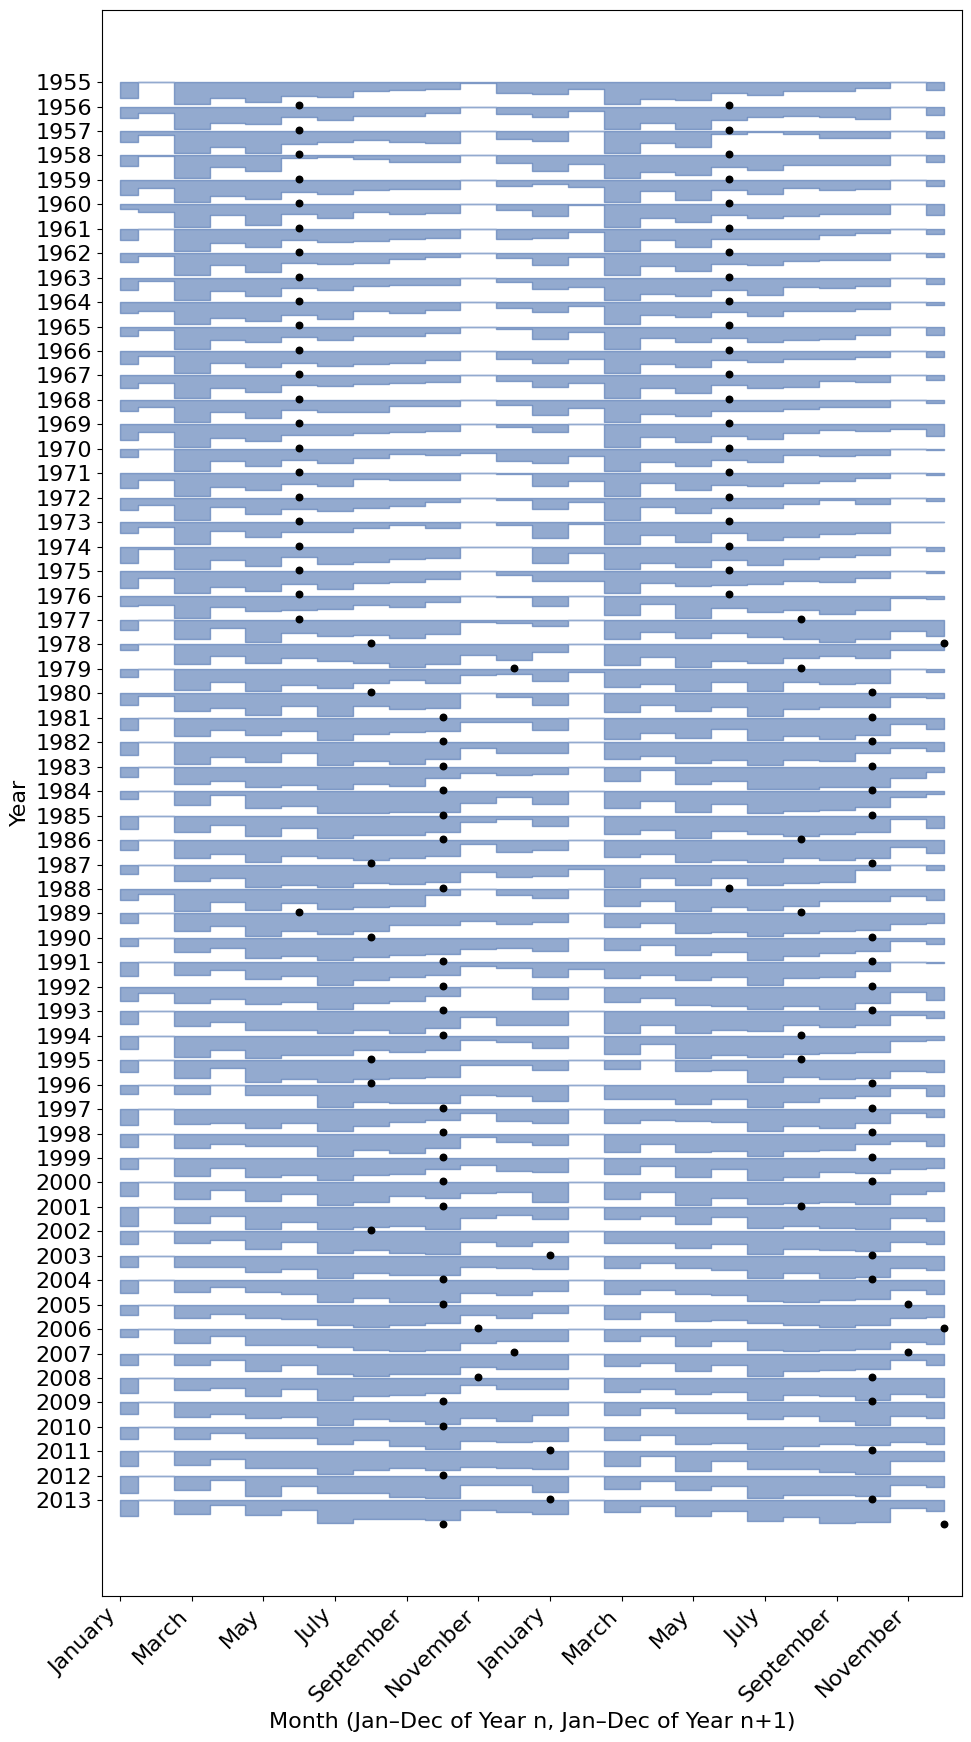

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

# Reload data
df = pd.read_csv('data.csv', header=None, names=['Year', 'Month', 'Births', 'PeakFlag'])

# Month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Pivot Year × Month
pivot = df.pivot(index='Year', columns='Month', values='Births')[month_order]

# Peak flag per year
peak_flag = df.groupby('Year', sort=False)['PeakFlag'].first()

# Parameters
offset_step = 1.1
years = pivot.index.tolist()
valid_years = years[:-1]  # last year lacks n+1
fig_height = max(8, len(valid_years) * 0.3)

fig, ax = plt.subplots(figsize=(10, fig_height))
fill_color = "#4C72B0"
for i, year in enumerate(valid_years):
    baseline = i * offset_step
    next_year = year + 1

    # Normalise each 12‑month segment separately
    series_n = pivot.loc[year].values.astype(float)
    series_n1 = pivot.loc[next_year].values.astype(float)

    n_norm = (series_n - series_n.min()) / (series_n.max() - series_n.min())
    n1_norm = (series_n1 - series_n1.min()) / (series_n1.max() - series_n1.min())

    series24_norm = np.concatenate([n_norm, n1_norm])

    # Fill
    ax.fill_between(range(24), baseline, baseline + series24_norm,
                    step='mid', alpha=0.6, color=fill_color)

    # Dots for peaks
    pk_curr = int(peak_flag.loc[year])-1
    pk_next = int(peak_flag.loc[next_year])-1
    ax.scatter(pk_curr, baseline + 1.05, s=22, zorder=3, color='black')
    ax.scatter(pk_next + 12, baseline + 1.05, s=22, zorder=3, color='black')

# Axis styling
xtick_locs = list(range(0, 25, 2))
xtick_labels = [month_order[i % 12] for i in xtick_locs]
ax.set_xticks(xtick_locs)
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')

ax.set_yticks([i * offset_step for i in range(len(valid_years))])
ax.set_yticklabels(valid_years)
ax.set_xlim(-0.5, 23.5)
ax.set_xlabel('Month (Jan–Dec of Year n, Jan–Dec of Year n+1)')
ax.set_ylabel('Year')
#ax.set_title('Double‑Plotted Birthogram — Each 12‑month segment normalised separately')
ax.invert_yaxis()

plt.tight_layout()
plt.show()